# Mobile Phones Price and Feature Analysis

### Load and Inspect Dataset


In [5]:
# This block loads the mobile phone dataset and inspects the first few rows to get an overview of the data.
import pandas as pd
# Load the dataset with appropriate encoding
data = pd.read_csv(r'mobiles.csv', encoding='unicode_escape')
data.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


### Cleaning and Preprocessing
##### This block handles missing values, converts columns to appropriate data types, and cleans any inconsistencies in the data (e.g., converting price columns to numerical values).

In [6]:
data.loc[929]

Company Name                            Samsung
Model Name                   Galaxy Z Fold6 1TB
Mobile Weight                              239g
RAM                                        12GB
Front Camera                    10MP, 4MP (UDC)
Back Camera                                50MP
Processor                    Snapdragon 8 Gen 3
Battery Capacity                        4400mAh
Screen Size                          7.6 inches
Launched Price (Pakistan)         Not available
Launched Price (India)              INR 200,999
Launched Price (China)              CNY 17,999 
Launched Price (USA)                  USD 2,259
Launched Price (Dubai)                AED 8,699
Launched Year                              2024
Name: 929, dtype: object

In [7]:
# I searched the price of phone in Pakistan from internet 
data.loc[929, 'Launched Price (Pakistan)'] = "PKR 604,999"

In [8]:
# Remove currency symbols and commas, then convert price columns to numeric
data['Launched Price (Pakistan)'] = data['Launched Price (Pakistan)'].str.replace('PKR', '').str.replace(',', '').astype('float64')
data['Launched Price (India)'] = data['Launched Price (India)'].str.replace('INR ', '').str.replace(',', '').astype('float64')
data['Launched Price (China)'] = data['Launched Price (China)'].str.replace('CNY ', '').str.replace(',', '').str.replace('¥', '').astype('float64')
data['Launched Price (USA)'] = data['Launched Price (USA)'].str.replace('USD ', '').str.replace(',', '').astype('float64')
data['Launched Price (Dubai)'] = data['Launched Price (Dubai)'].str.replace('AED ', '').str.replace(',', '').astype('float64')
data

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,224999.0,79999.0,5799.0,799.0,2799.0,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,234999.0,84999.0,6099.0,849.0,2999.0,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,244999.0,89999.0,6499.0,899.0,3199.0,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,249999.0,89999.0,6199.0,899.0,3199.0,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,259999.0,94999.0,6499.0,949.0,3399.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,66220.0,23999.0,2099.0,280.0,1029.0,2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,71220.0,25999.0,2299.0,300.0,1099.0,2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,604999.0,164999.0,13999.0,1899.0,7199.0,2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,544999.0,176999.0,15999.0,1719.0,7699.0,2024


### Exploratory Data Analysis (EDA)
##### This block performs basic statistical analysis, visualizes the distribution of various features (such as price, RAM, battery capacity, etc.), and investigates correlations between them.

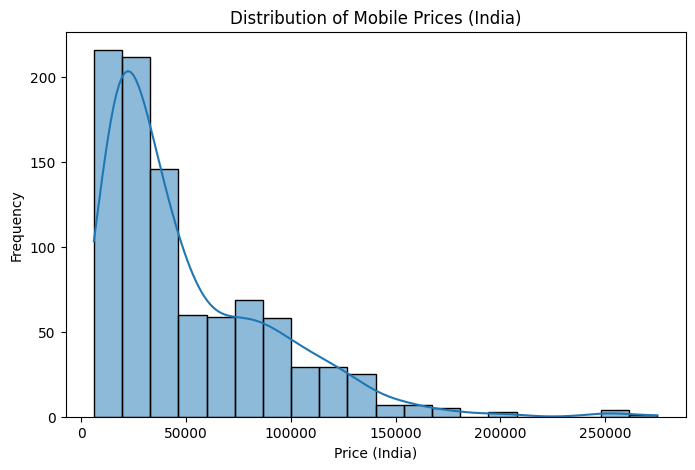

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(data['Launched Price (India)'].dropna(), bins=20, kde=True)
plt.title('Distribution of Mobile Prices (India)')
plt.xlabel('Price (India)')
plt.ylabel('Frequency')
plt.show()

### Price Distribution Analysis
##### Here, I analyze how mobile prices are distributed across different countries and explore the variation in prices based on different mobile features like screen size and RAM.

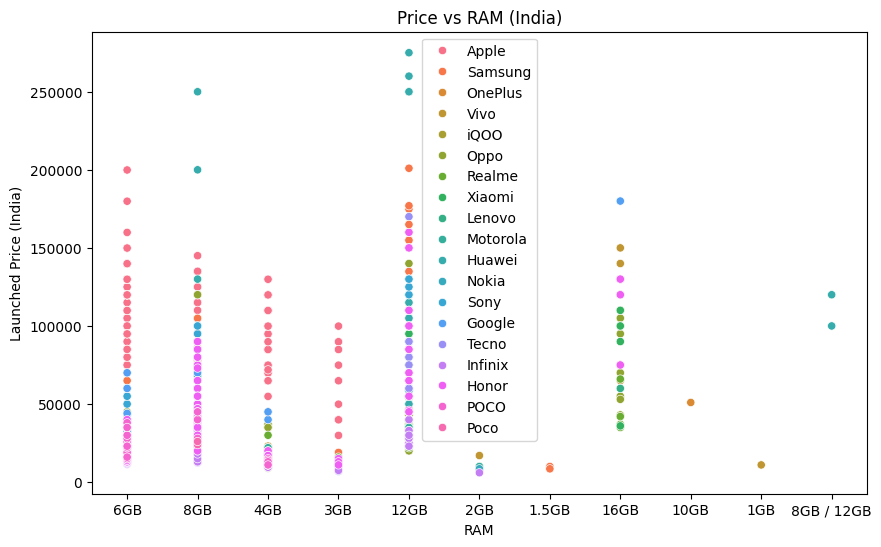

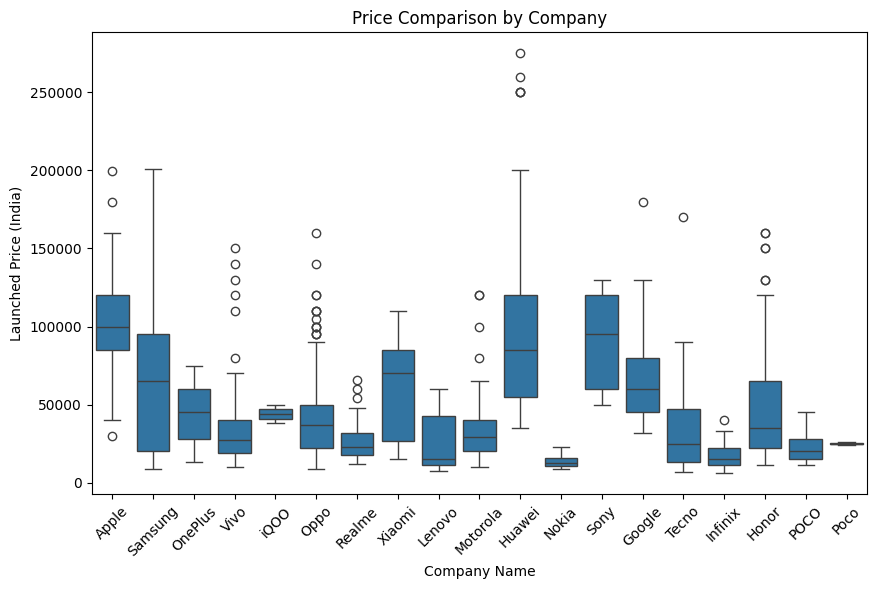

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='RAM', y='Launched Price (India)', hue='Company Name')
plt.title('Price vs RAM (India)')
plt.legend(loc = 'best')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Company Name', y='Launched Price (India)', data=data)
plt.title('Price Comparison by Company')
plt.xticks(rotation=45)
plt.show()

### Model-wise price Comparison
##### This block compares the prices of different models from the same company to identify price trends.

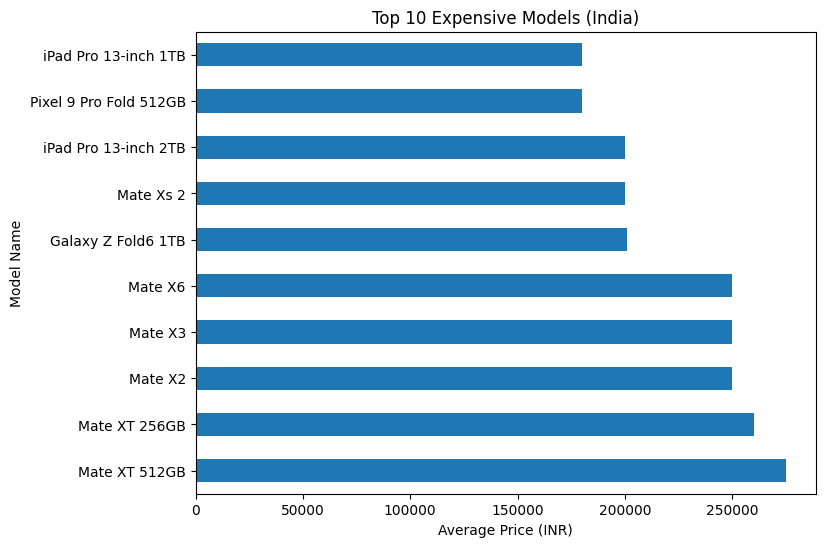

In [ ]:
top_models = data.groupby('Model Name')['Launched Price (India)'].mean().sort_values(ascending=False).head(10)
top_models.plot(kind='barh', title='Top 10 Expensive Models (India)', figsize=(8, 6))
plt.xlabel('Average Price (INR)')
plt.show()

### Price Trends over the years
##### This analysis identifies which companies launched the most expensive phones and tracks price trends by year.

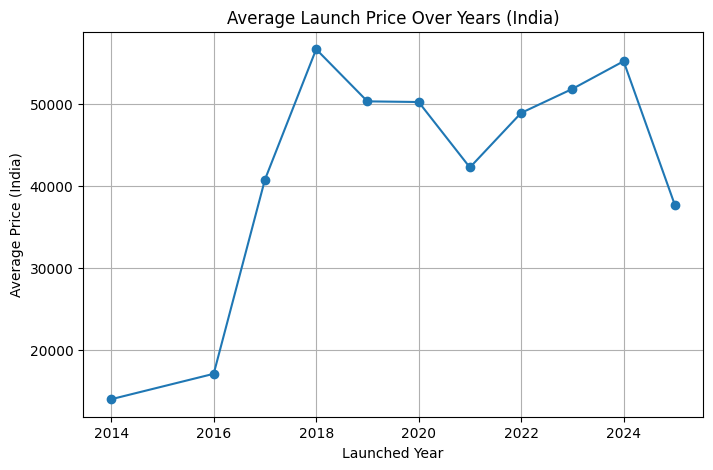

In [24]:
yearly_prices = data.groupby('Launched Year')['Launched Price (India)'].mean()
yearly_prices.plot(marker='o', title='Average Launch Price Over Years (India)', figsize=(8, 5))
plt.ylabel('Average Price (India)')
plt.grid(True)
plt.show()